In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
df = pd.read_csv('../00_data/00_statistical_data/E0_processed.csv')

df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

df

,Date,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,...,HomeTeam_FullTimeGoals_mean,HomeTeam_Shots_mean,HomeTeam_ShotsOnTarget_mean,HomeTeam_Corners_mean,HomeTeam_Fouls_mean,HomeTeam_YellowCards_mean,HomeTeam_points,HomeTeamRate,AwayTeamRate,season
19,2000-08-26,Arsenal,Charlton,H,5.0,3.0,1.0,2.0,18.0,7.0,...,1.0,12.5,7.0,6.0,17.5,2.5,1.5,2.526316,0.736842,2001
20,2000-08-26,Bradford,Leicester,D,0.0,0.0,0.0,0.0,8.0,13.0,...,1.0,14.0,6.5,6.0,11.0,0.5,1.5,1.000000,0.736842,2001
21,2000-08-26,Everton,Derby,D,2.0,2.0,2.0,0.0,12.0,7.0,...,1.5,15.0,8.0,4.5,19.0,1.5,1.5,1.368421,0.578947,2001
22,2000-08-26,Ipswich,Sunderland,H,1.0,0.0,0.0,0.0,14.0,9.0,...,1.0,16.5,7.0,3.5,12.0,0.5,0.5,2.000000,1.210526,2001
23,2000-08-26,Man City,Coventry,A,1.0,2.0,0.0,2.0,14.0,9.0,...,2.0,16.0,12.0,6.5,18.5,2.0,1.5,0.789474,0.789474,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,2024-05-19,Crystal Palace,Aston Villa,H,5.0,0.0,2.0,0.0,15.0,8.0,...,2.6,15.6,6.6,6.0,11.0,2.0,2.6,1.473684,1.473684,2024
9116,2024-05-19,Liverpool,Wolves,H,2.0,0.0,2.0,0.0,36.0,4.0,...,1.4,16.6,7.4,4.6,8.8,1.0,1.6,2.526316,1.000000,2024
9117,2024-05-19,Luton,Fulham,A,2.0,4.0,1.0,2.0,15.0,15.0,...,0.6,18.8,6.8,7.0,11.4,1.4,0.2,0.842105,0.947368,2024
9118,2024-05-19,Man City,West Ham,H,3.0,1.0,2.0,1.0,28.0,3.0,...,2.0,10.4,4.6,4.4,9.0,1.2,3.0,2.473684,1.210526,2024


In [11]:
X = df[['AwayTeam_FullTimeGoals_mean', 'AwayTeam_Shots_mean',
       'AwayTeam_ShotsOnTarget_mean', 'AwayTeam_Corners_mean',
       'AwayTeam_Fouls_mean', 'AwayTeam_YellowCards_mean', 'AwayTeam_points',
       'HomeTeam_FullTimeGoals_mean', 'HomeTeam_Shots_mean',
       'HomeTeam_ShotsOnTarget_mean', 'HomeTeam_Corners_mean',
       'HomeTeam_Fouls_mean', 'HomeTeam_YellowCards_mean', 'HomeTeam_points',
       'HomeTeamRate', 'AwayTeamRate'
]]

y = df['FTR']

y = y.map({'H': 0, 'D': 1, 'A': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12239164)

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8, 3), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       820
           1       0.29      0.24      0.26       403
           2       0.47      0.57      0.51       498

    accuracy                           0.51      1721
   macro avg       0.47      0.47      0.47      1721
weighted avg       0.51      0.51      0.51      1721



# RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X = df[['AwayTeam_FullTimeGoals_mean', 'AwayTeam_Shots_mean',
       'AwayTeam_ShotsOnTarget_mean', 'AwayTeam_Corners_mean',
       'AwayTeam_Fouls_mean', 'AwayTeam_YellowCards_mean', 'AwayTeam_points',
       'HomeTeam_FullTimeGoals_mean', 'HomeTeam_Shots_mean',
       'HomeTeam_ShotsOnTarget_mean', 'HomeTeam_Corners_mean',
       'HomeTeam_Fouls_mean', 'HomeTeam_YellowCards_mean', 'HomeTeam_points',
       'HomeTeamRate', 'AwayTeamRate']]

y = df['FTR'].map({'H': 0, 'D': 1, 'A': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12239164)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

model = RNNModel(input_size=1, hidden_size=64, output_size=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

model.eval()

y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       820
           1       0.29      0.03      0.06       403
           2       0.56      0.60      0.58       498

    accuracy                           0.59      1721
   macro avg       0.49      0.50      0.45      1721
weighted avg       0.52      0.59      0.52      1721



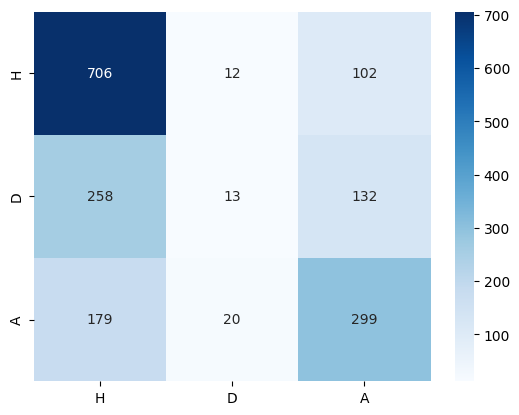

In [16]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()

# LSTM

In [17]:
X = df[['AwayTeam_FullTimeGoals_mean', 'AwayTeam_Shots_mean',
       'AwayTeam_ShotsOnTarget_mean', 'AwayTeam_Corners_mean',
       'AwayTeam_Fouls_mean', 'AwayTeam_YellowCards_mean', 'AwayTeam_points',
       'HomeTeam_FullTimeGoals_mean', 'HomeTeam_Shots_mean',
       'HomeTeam_ShotsOnTarget_mean', 'HomeTeam_Corners_mean',
       'HomeTeam_Fouls_mean', 'HomeTeam_YellowCards_mean', 'HomeTeam_points',
       'HomeTeamRate', 'AwayTeamRate']]

y = df['FTR'].map({'H': 0, 'D': 1, 'A': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12239164)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_size=1, hidden_size=64, output_size=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.82      0.70       820
           1       0.29      0.09      0.14       403
           2       0.56      0.57      0.57       498

    accuracy                           0.58      1721
   macro avg       0.49      0.49      0.47      1721
weighted avg       0.52      0.58      0.53      1721



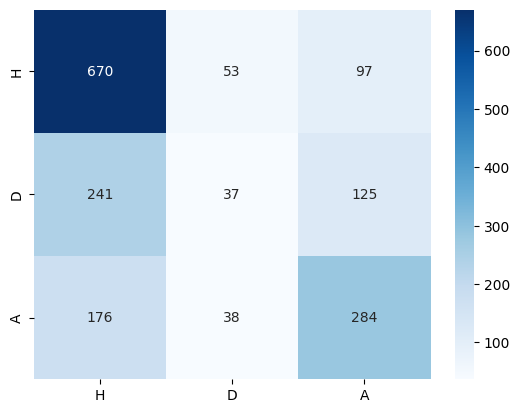

In [19]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()

# xLSTM

In [26]:
from xlstm import xLSTMBlockStack, xLSTMBlockStackConfig, mLSTMBlockConfig, mLSTMLayerConfig

X = df[['AwayTeam_FullTimeGoals_mean', 'AwayTeam_Shots_mean',
       'AwayTeam_ShotsOnTarget_mean', 'AwayTeam_Corners_mean',
       'AwayTeam_Fouls_mean', 'AwayTeam_YellowCards_mean', 'AwayTeam_points',
       'HomeTeam_FullTimeGoals_mean', 'HomeTeam_Shots_mean',
       'HomeTeam_ShotsOnTarget_mean', 'HomeTeam_Corners_mean',
       'HomeTeam_Fouls_mean', 'HomeTeam_YellowCards_mean', 'HomeTeam_points',
       'HomeTeamRate', 'AwayTeamRate']]

y = df['FTR'].map({'H': 0, 'D': 1, 'A': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12239164)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class xLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(xLSTMModel, self).__init__()
        cfg = xLSTMBlockStackConfig(
            mlstm_block=mLSTMBlockConfig(
                mlstm=mLSTMLayerConfig(
                    conv1d_kernel_size=4, 
                    qkv_proj_blocksize=4, 
                    num_heads=4
                )
            ),
            context_length=1,
            num_blocks=1,
            embedding_dim=hidden_size
        )
        self.xlstm = xLSTMBlockStack(cfg)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.unsqueeze(1)
        out = self.xlstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = xLSTMModel(input_size=X_train.shape[1], hidden_size=X_train.shape[1], output_size=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       820
           1       0.27      0.21      0.24       403
           2       0.49      0.49      0.49       498

    accuracy                           0.51      1721
   macro avg       0.46      0.46      0.46      1721
weighted avg       0.50      0.51      0.50      1721



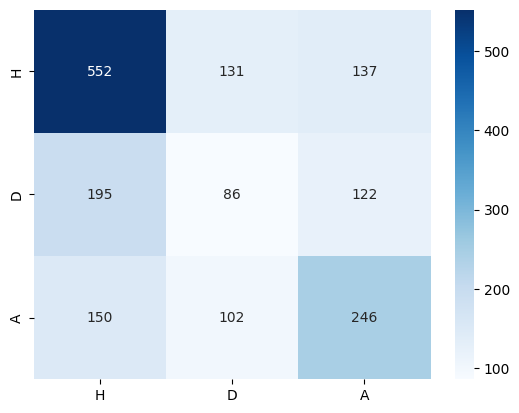

In [27]:
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.show()